In [18]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_hdf("nsfg.hdf5")

In [27]:
df 
# 9258 rows 
# 10 columns

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914
...,...,...,...,...,...,...,...,...,...,...
9353,70615,1,4.0,11.0,35,1.0,1758,1825.0,22.0,8117.554461
9354,70616,1,8.0,7.0,42,1.0,1741,1816.0,18.0,6842.240477
9355,70616,1,7.0,6.0,36,1.0,2091,2158.0,23.0,6842.240477
9356,70619,1,8.0,3.0,41,1.0,3450,3525.0,31.0,3856.253532


In [26]:
df.columns
#index is a pandas data structure
#treat it like a list

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [23]:
df.columns[1]

'outcome'

In [24]:
outcome = df["outcome"]
# here we have accessed the column using column name as the key

In [29]:
type(outcome)
#series is a pandas data structure
# just like python list with some additional feature
# when we print series we get the values with their index number

pandas.core.series.Series

In [31]:
print(outcome)
# last line includes variable name, series length and data type
# int64 is a data type provided by numpy
#64 here means 64 bits machine
#if we were running this example in a 32 bit machine then the data type would be int32

0       1
1       1
2       1
3       6
4       1
       ..
9353    1
9354    1
9355    1
9356    1
9357    1
Name: outcome, Length: 9358, dtype: int64


In [32]:
# accessing elemnt using index
outcome[3]

6

In [34]:
# accessing elemnt using slice
outcome[3:6]

3    6
4    1
5    4
Name: outcome, dtype: int64

In [35]:
# we can also access the columns of a DF using dot notation
outcome = df.outcome

In [37]:
print(outcome)

0       1
1       1
2       1
3       6
4       1
       ..
9353    1
9354    1
9355    1
9356    1
9357    1
Name: outcome, Length: 9358, dtype: int64


In [38]:
# The number 8 in (nbrnaliv) column (number of babies born alive at the end of pregnancy) indicates that the repondent refused to answer
df["nbrnaliv"].value_counts()
# We must replace it, the other values (1, 2, 3) indicate the number of babies

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [40]:
# Replacing 8 with NaN
df["nbrnaliv"].replace(8, np.nan, inplace = True)
df["nbrnaliv"].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [41]:
pounds = df["birthwgt_lb1"]
pounds.value_counts().sort_index()
# The most frequent values are 6-8 pounds, 98.0 and 99.0 indicate missing data

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [42]:
# Then we replace the 98.0 and 99.0 pounds with NaN to represent missing data
pounds = pounds.replace([98, 99], np.nan)

In [43]:
# The same thing for ounces
ounces = df["birthwgt_oz1"]
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

In [44]:
ounces = ounces.replace([98, 99], np.nan)

In [45]:
# Calculating the total birth weight
# 1 pound = 16 ounces
birth_weight = pounds + (ounces / 16)
# Some statistics about the total birth weight
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

In [54]:
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

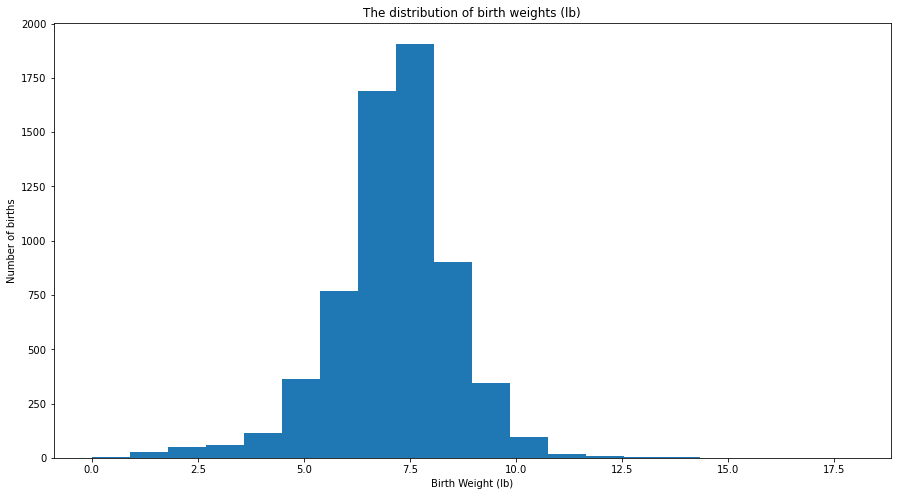

In [55]:
plt.hist(birth_weight.dropna(), bins=20)
sns.set_style('whitegrid')
plt.xlabel("Birth Weight (lb)")
plt.ylabel("Number of births")
plt.title("The distribution of birth weights (lb)")
plt.gcf().set_size_inches(15, 8)
plt.show

In [50]:
df.describe()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
count,9358.000000,9358.000000,6485.000000,6391.000000,9358.000000,6484.000000,9358.000000,9109.000000,6485.000000,9358.000000
mean,65502.392605,1.773990,8.055204,7.213895,29.896345,1.016965,2446.330199,2494.934570,28.992136,10759.200147
std,2953.471315,1.348648,11.178893,8.254885,13.685389,0.134989,579.392363,578.099231,10.367124,11400.179222
min,60418.000000,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000
25%,62875.750000,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407
50%,65499.000000,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994158
75%,68111.000000,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322982
max,70619.000000,6.000000,99.000000,99.000000,48.000000,3.000000,4350.000000,4350.000000,99.000000,75399.410000


### Does Pre-term and Full-term babies have different weights ?
Pre-term Babies : Babies born before 37 weeks are considered pre-term, more commonly known as premature.

Full-term Babies : Babies those are born after 37 weeks are considered as full-term.

In [59]:
preterm = df['prglngth']<37

print(f'\nAverage Weight of all preterm babies : {birth_weight[preterm].mean()} lb\n')

print(f'Average Weight of all full term babies : {birth_weight[~preterm].mean()} lb')

#We can infer that the full-term babies have more weight than the pre-term babies.


Average Weight of all preterm babies : 5.577598314606742 lb

Average Weight of all full term babies : 7.372323879231473 lb


### What is the percentage of Induced abortion and Miscarriage in USA ?

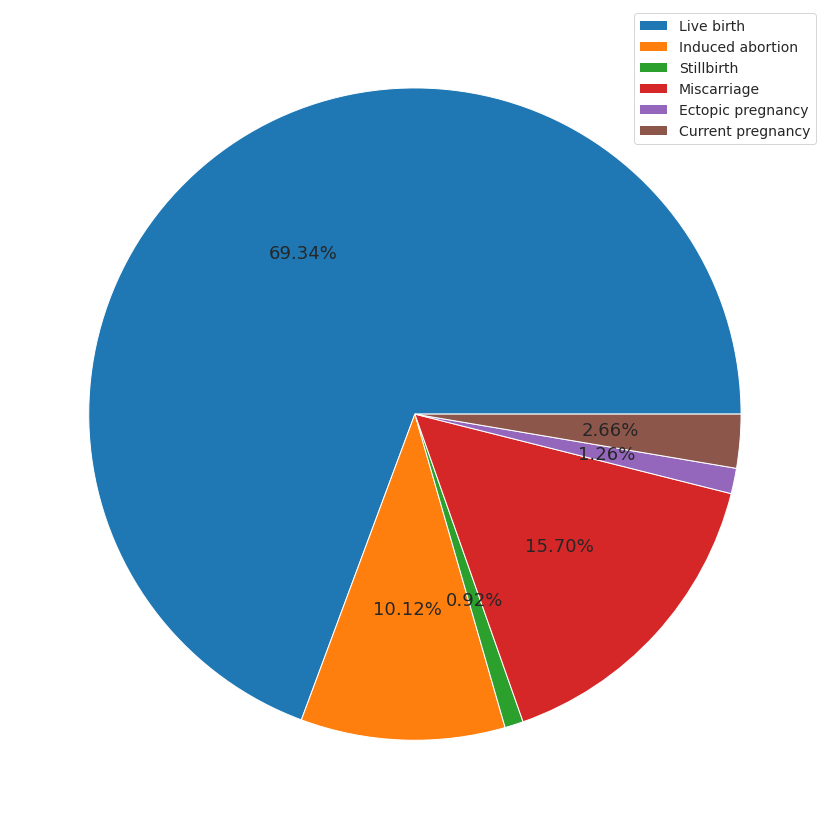

In [62]:
outcome = df['outcome'].value_counts().sort_index()
label = ['Live birth','Induced abortion','Stillbirth','Miscarriage','Ectopic pregnancy','Current pregnancy']

fig, ax = plt.subplots(1, figsize=(15, 15))
ax.pie(outcome, autopct='%1.2f%%', textprops={'fontsize': 18})
plt.legend(label,prop={'size': 14})
plt.show()

### Are most of the Multiple born babies (like twins) are Pre-term babies ?

In [70]:
single = df['nbrnaliv'] == 1
single_preterm = (preterm & single).sum() # single born Pre-term babies
single_fullterm = (~preterm & single).sum() # single born Full-term babies
total_single = single_preterm + single_fullterm

multiple_preterm = (preterm & ~single).sum() # Multiple born Pre-term babies
multiple_fullterm = (~preterm & ~single).sum() # Multiple born Full-term babies
total_multiple = multiple_preterm + multiple_fullterm

In [83]:
single_preterm

850

In [86]:
single_fullterm

5529

In [84]:
multiple_fullterm

87

In [85]:
multiple_preterm

2892

TypeError: 'list' object is not callable

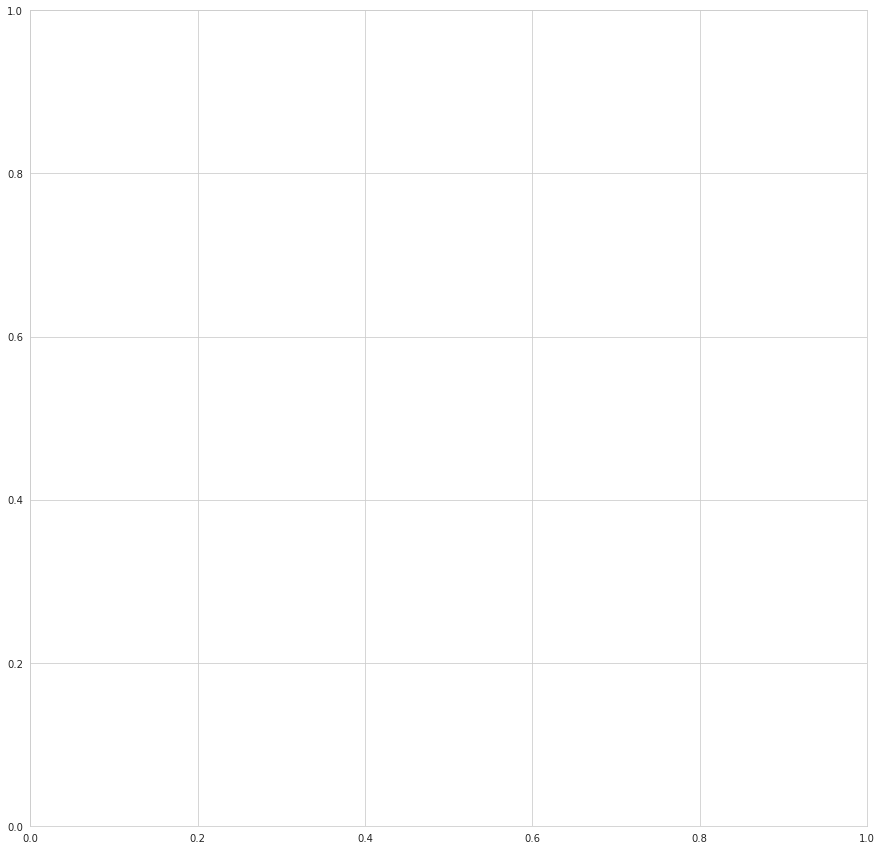

In [92]:
fig,ax = plt.subplots(1,figsize = (15,15))

cmap = plt.colormaps()
outer_colors = cmap(np.arange(3)*4)
ax.pie([total_single, total_multiple], radius=1,
                                   colors=outer_colors, autopct='%1.2f%%', textprops={'fontsize': 18})

ax.pie([single_preterm, single_fullterm, multiple_preterm,
                                    multiple_fullterm], radius=0.4, colors=inner_colors, autopct='%1.2f%%', textprops={'fontsize': 14})
plt.legend(label, prop={'size': 14})
plt.show()